In [1]:
import oracles
import numpy as np
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, diags
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from inspect import getfullargspec
from itertools import product
from optimization import *
from plot_trajectory_2d import plot_levels, plot_trajectory
import matplotlib.pyplot as plt
from utils import *
from sklearn.datasets import load_svmlight_file
%load_ext autoreload
%autoreload 2

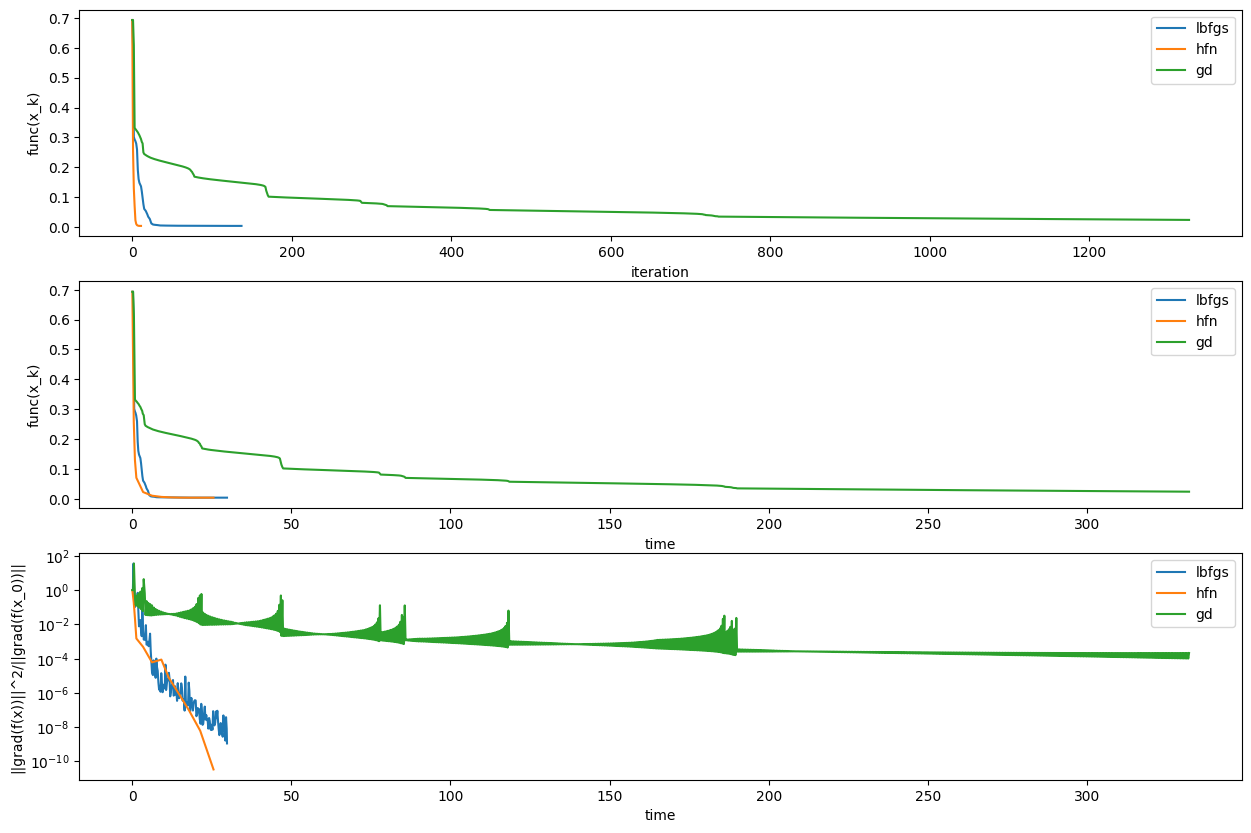

In [2]:
A, b = load_svmlight_file('gisette')
A, _, b, _ = train_test_split(A, b, test_size=0.1)
x_0 = np.zeros(A.shape[1])
regcoef = 1.0 / len(b)
oracle = oracles.create_log_reg_oracle(A, b, regcoef)

traces = [
    lbfgs(oracle, x_0, trace=True)[2],
    hessian_free_newton(oracle, x_0, trace=True)[2],
    gradient_descent(oracle, x_0, trace=True)[2]
]

_, axs = plt.subplots(3, 1, figsize=(15, 10))

for trace, label in zip(traces, ['lbfgs', 'hfn', 'gd']):
    plt.sca(axs[0])
    y = np.array(trace['func'])
    x = np.arange(len(trace['grad_norm']))
    plt.plot(x, y, label=label)
    plt.ylabel("func(x_k)")
    plt.xlabel("iteration")
    plt.legend()

for trace, label in zip(traces, ['lbfgs', 'hfn', 'gd']):
    plt.sca(axs[1])
    y = np.array(trace['func'])
    x = np.array(trace['time'])
    plt.plot(x, y, label=label)
    plt.ylabel("func(x_k)")
    plt.xlabel("time")
    plt.legend()

for trace, label in zip(traces, ['lbfgs', 'hfn', 'gd']):
    plt.sca(axs[2])
    grad_x0 = trace['grad_norm'][0]**2
    y = np.array(trace['grad_norm'])*np.array(trace['grad_norm']) / grad_x0
    x = np.array(trace['time'])
    plt.plot(x, y, label=label)
    plt.xlabel("time")
    plt.ylabel("||grad(f(x))||^2/||grad(f(x_0))||")
    plt.legend()
    plt.yscale('log')

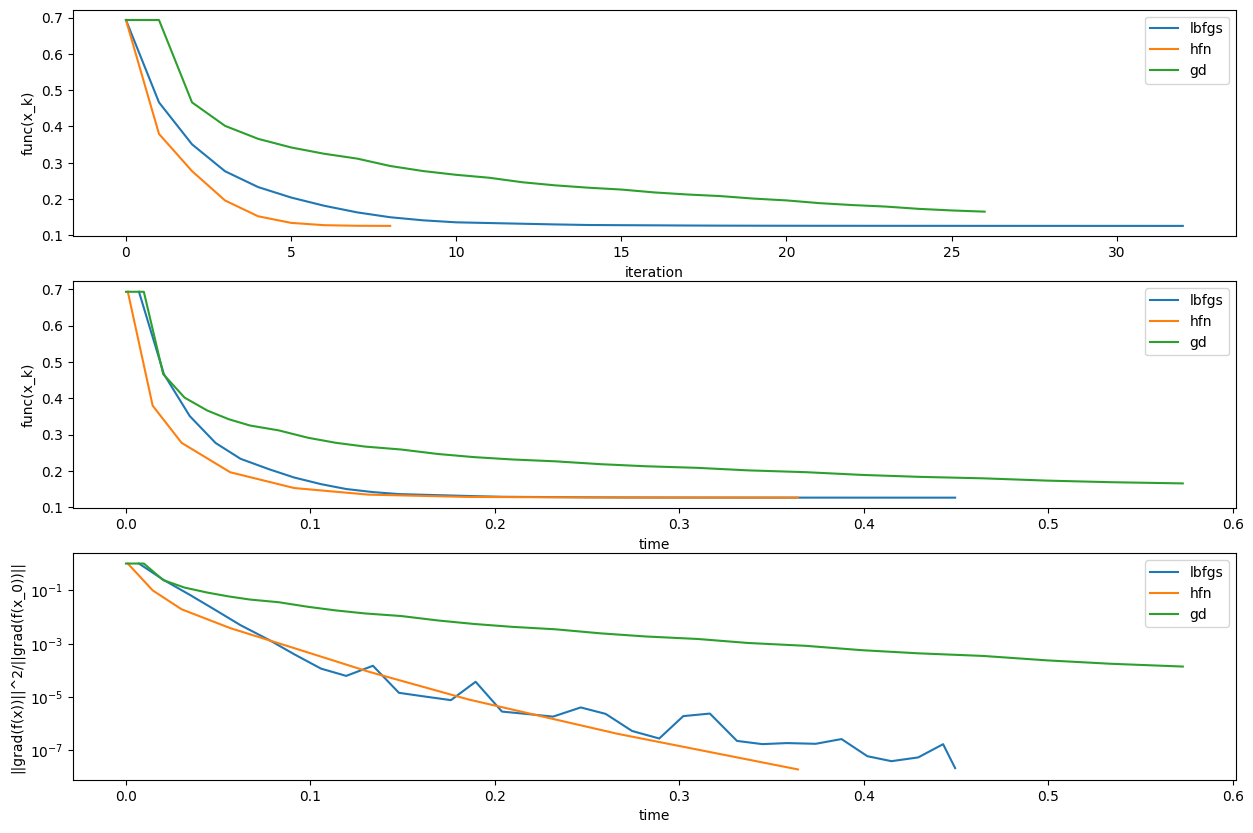

In [3]:
A, b = load_svmlight_file('w8a')
A, _, b, _ = train_test_split(A, b, test_size=0.1)
x_0 = np.zeros(A.shape[1])
regcoef = 1.0 / len(b)
oracle = oracles.create_log_reg_oracle(A, b, regcoef)

traces = [
    lbfgs(oracle, x_0, trace=True)[2],
    hessian_free_newton(oracle, x_0, trace=True)[2],
    gradient_descent(oracle, x_0, trace=True)[2]
]

_, axs = plt.subplots(3, 1, figsize=(15, 10))

for trace, label in zip(traces, ['lbfgs', 'hfn', 'gd']):
    plt.sca(axs[0])
    y = np.array(trace['func'])
    x = np.arange(len(trace['grad_norm']))
    plt.plot(x, y, label=label)
    plt.ylabel("func(x_k)")
    plt.xlabel("iteration")
    plt.legend()

for trace, label in zip(traces, ['lbfgs', 'hfn', 'gd']):
    plt.sca(axs[1])
    y = np.array(trace['func'])
    x = np.array(trace['time'])
    plt.plot(x, y, label=label)
    plt.ylabel("func(x_k)")
    plt.xlabel("time")
    plt.legend()

for trace, label in zip(traces, ['lbfgs', 'hfn', 'gd']):
    plt.sca(axs[2])
    grad_x0 = trace['grad_norm'][0]**2
    y = np.array(trace['grad_norm'])*np.array(trace['grad_norm']) / grad_x0
    x = np.array(trace['time'])
    plt.plot(x, y, label=label)
    plt.xlabel("time")
    plt.ylabel("||grad(f(x))||^2/||grad(f(x_0))||")
    plt.legend()
    plt.yscale('log')

c:\Users\hkl19\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


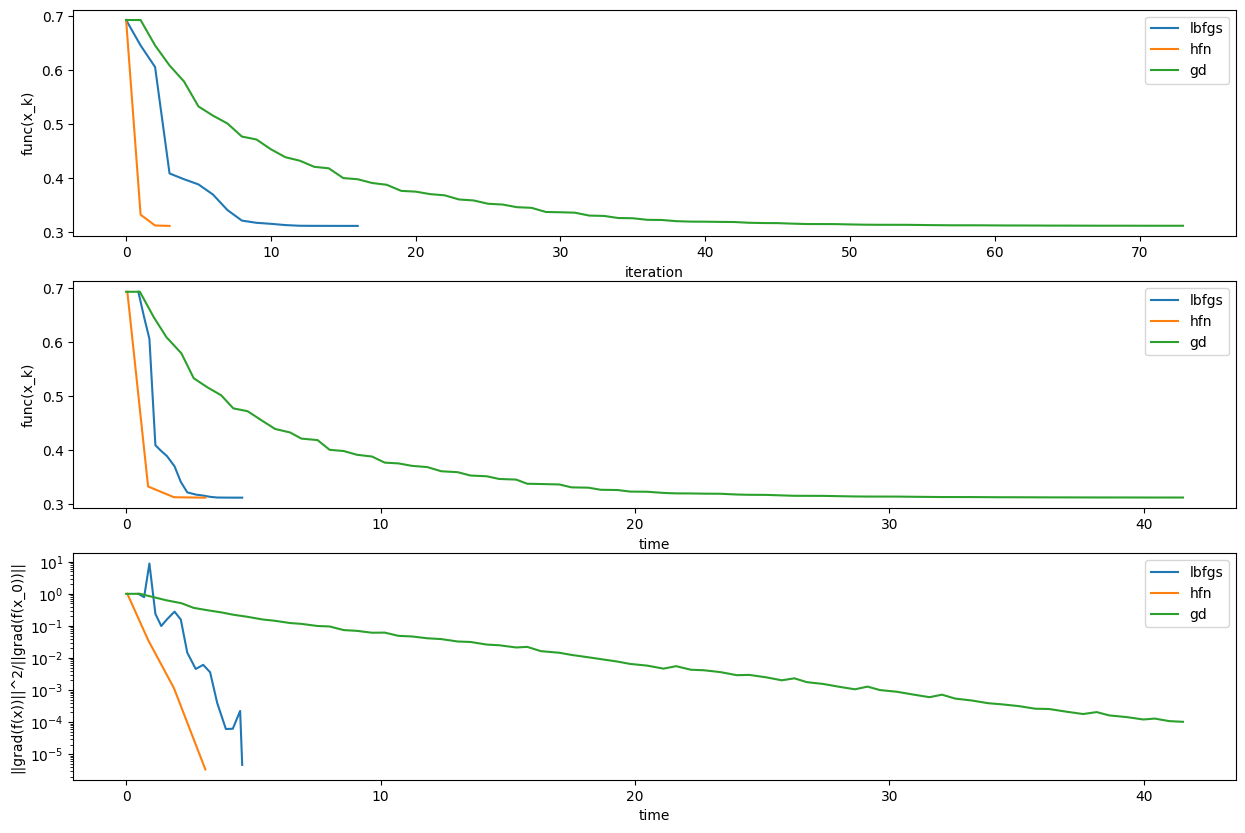

In [4]:
A, b = load_svmlight_file('news20.binary')
A, _, b, _ = train_test_split(A, b, test_size=0.1)
x_0 = np.zeros(A.shape[1])
regcoef = 1.0 / len(b)
oracle = oracles.create_log_reg_oracle(A, b, regcoef)

traces = [
    lbfgs(oracle, x_0, trace=True)[2],
    hessian_free_newton(oracle, x_0, trace=True)[2],
    gradient_descent(oracle, x_0, trace=True)[2]
]

_, axs = plt.subplots(3, 1, figsize=(15, 10))

for trace, label in zip(traces, ['lbfgs', 'hfn', 'gd']):
    plt.sca(axs[0])
    y = np.array(trace['func'])
    x = np.arange(len(trace['grad_norm']))
    plt.plot(x, y, label=label)
    plt.ylabel("func(x_k)")
    plt.xlabel("iteration")
    plt.legend()

for trace, label in zip(traces, ['lbfgs', 'hfn', 'gd']):
    plt.sca(axs[1])
    y = np.array(trace['func'])
    x = np.array(trace['time'])
    plt.plot(x, y, label=label)
    plt.ylabel("func(x_k)")
    plt.xlabel("time")
    plt.legend()

for trace, label in zip(traces, ['lbfgs', 'hfn', 'gd']):
    plt.sca(axs[2])
    grad_x0 = trace['grad_norm'][0]**2
    y = np.array(trace['grad_norm'])*np.array(trace['grad_norm']) / grad_x0
    x = np.array(trace['time'])
    plt.plot(x, y, label=label)
    plt.xlabel("time")
    plt.ylabel("||grad(f(x))||^2/||grad(f(x_0))||")
    plt.legend()
    plt.yscale('log')

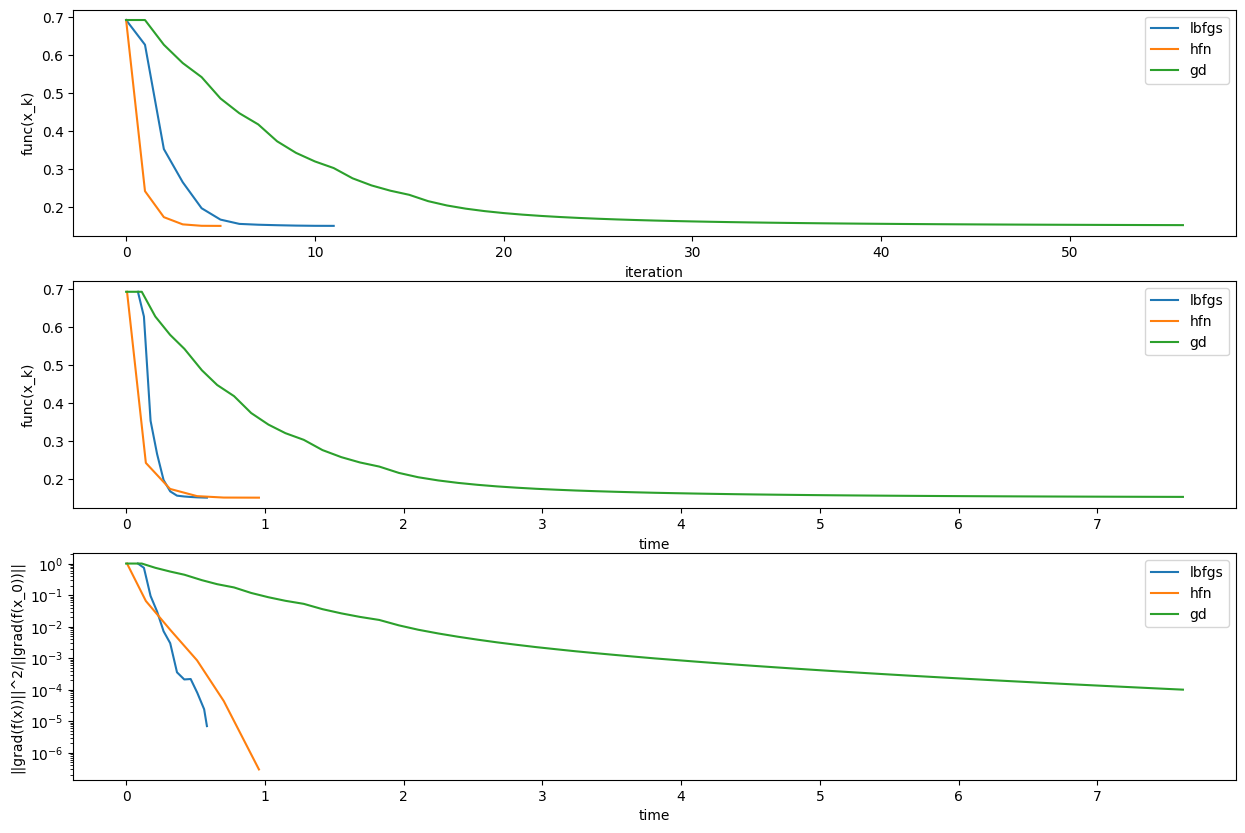

In [5]:
A, b = load_svmlight_file('real-sim')
A, _, b, _ = train_test_split(A, b, test_size=0.1)
x_0 = np.zeros(A.shape[1])
regcoef = 1.0 / len(b)
oracle = oracles.create_log_reg_oracle(A, b, regcoef)

traces = [
    lbfgs(oracle, x_0, trace=True)[2],
    hessian_free_newton(oracle, x_0, trace=True)[2],
    gradient_descent(oracle, x_0, trace=True)[2]
]

_, axs = plt.subplots(3, 1, figsize=(15, 10))

for trace, label in zip(traces, ['lbfgs', 'hfn', 'gd']):
    plt.sca(axs[0])
    y = np.array(trace['func'])
    x = np.arange(len(trace['grad_norm']))
    plt.plot(x, y, label=label)
    plt.ylabel("func(x_k)")
    plt.xlabel("iteration")
    plt.legend()

for trace, label in zip(traces, ['lbfgs', 'hfn', 'gd']):
    plt.sca(axs[1])
    y = np.array(trace['func'])
    x = np.array(trace['time'])
    plt.plot(x, y, label=label)
    plt.ylabel("func(x_k)")
    plt.xlabel("time")
    plt.legend()

for trace, label in zip(traces, ['lbfgs', 'hfn', 'gd']):
    plt.sca(axs[2])
    grad_x0 = trace['grad_norm'][0]**2
    y = np.array(trace['grad_norm'])*np.array(trace['grad_norm']) / grad_x0
    x = np.array(trace['time'])
    plt.plot(x, y, label=label)
    plt.xlabel("time")
    plt.ylabel("||grad(f(x))||^2/||grad(f(x_0))||")
    plt.legend()
    plt.yscale('log')

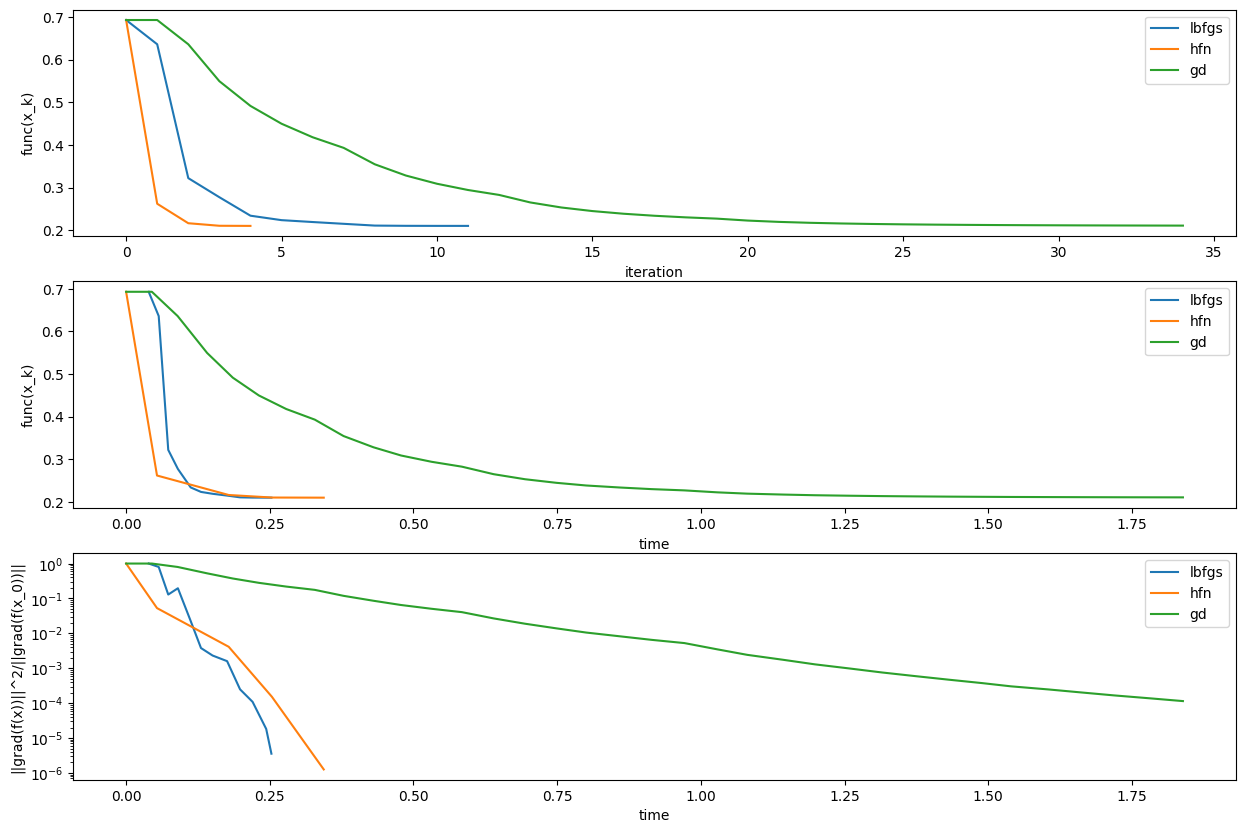

In [6]:
A, b = load_svmlight_file('rcv1_train.binary')
A, _, b, _ = train_test_split(A, b, test_size=0.1)
x_0 = np.zeros(A.shape[1])
regcoef = 1.0 / len(b)
oracle = oracles.create_log_reg_oracle(A, b, regcoef)

traces = [
    lbfgs(oracle, x_0, trace=True)[2],
    hessian_free_newton(oracle, x_0, trace=True)[2],
    gradient_descent(oracle, x_0, trace=True)[2]
]

_, axs = plt.subplots(3, 1, figsize=(15, 10))

for trace, label in zip(traces, ['lbfgs', 'hfn', 'gd']):
    plt.sca(axs[0])
    y = np.array(trace['func'])
    x = np.arange(len(trace['grad_norm']))
    plt.plot(x, y, label=label)
    plt.ylabel("func(x_k)")
    plt.xlabel("iteration")
    plt.legend()

for trace, label in zip(traces, ['lbfgs', 'hfn', 'gd']):
    plt.sca(axs[1])
    y = np.array(trace['func'])
    x = np.array(trace['time'])
    plt.plot(x, y, label=label)
    plt.ylabel("func(x_k)")
    plt.xlabel("time")
    plt.legend()

for trace, label in zip(traces, ['lbfgs', 'hfn', 'gd']):
    plt.sca(axs[2])
    grad_x0 = trace['grad_norm'][0]**2
    y = np.array(trace['grad_norm'])*np.array(trace['grad_norm']) / grad_x0
    x = np.array(trace['time'])
    plt.plot(x, y, label=label)
    plt.xlabel("time")
    plt.ylabel("||grad(f(x))||^2/||grad(f(x_0))||")
    plt.legend()
    plt.yscale('log')